
# Data Analysis of Ireland climate indicies

# Steps involved:
- Understanding the Data
- Data Preparation
- Exploratory Data Analysis (EDA)
- Decomposition
- Stationarity Testing
- Statistical Analysis
- Model Selection
- Model Training
- Model Evaluation
- Forecasting

# 1. Understanding the Data

In [ ]:
 pip install pymannkendall

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymannkendall as mk
from google.colab import files
import io
from scipy import stats
from scipy.stats import kendalltau
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# Upload file
#uploaded = files.upload()

# Read the uploaded CSV file
#data = pd.read_csv(io.BytesIO(uploaded['all_yearly.csv']))
#print(data.head())
data = pd.read_csv('all_yearly.csv')



Saving all_yearly.csv to all_yearly.csv
  station_id  year  n_rain   R5mm  R10mm  R20mm   SDII  PRCPTOT   CDD   CWD  \
0    ATHENRY  2012     275    NaN    NaN    NaN    NaN      NaN   NaN   NaN   
1    ATHENRY  2013     365   78.0   33.0    9.0  6.703   1112.7  29.1  87.3   
2    ATHENRY  2014     365   96.0   35.0    5.0  6.468   1235.3  31.9  58.1   
3    ATHENRY  2015     365  116.0   50.0   10.0  7.527   1543.1  34.5  85.3   
4    ATHENRY  2016     366   76.0   23.0    3.0  5.623   1045.8  30.0  59.2   

   ...    TXn    TXx    DTR  TN10p  TN90p  TX10p  TX90p  WSDI  CSDI    GSL  
0  ...  3.054  25.70  6.879    NaN    NaN    NaN    NaN   NaN   NaN  328.0  
1  ...  2.570  29.23  7.216    NaN    NaN    NaN    NaN   NaN   NaN  321.0  
2  ...  4.791  26.65  7.532    NaN    NaN    NaN    NaN   NaN   NaN  337.0  
3  ...  2.837  22.83  7.469    NaN    NaN    NaN    NaN   NaN   NaN  353.0  
4  ...  3.212  28.41  7.238    NaN    NaN    NaN    NaN   NaN   NaN  304.0  

[5 rows x 32 columns]


In [ ]:
data.columns

Index(['station_id', 'year', 'n_rain', 'R5mm', 'R10mm', 'R20mm', 'SDII',
       'PRCPTOT', 'CDD', 'CWD', 'Rx1day', 'Rx5day', 'R95pTOT', 'R99pTOT',
       'n_maxdy', 'n_mindy', 'FD', 'TR', 'SU', 'ID', 'TNn', 'TNx', 'TXn',
       'TXx', 'DTR', 'TN10p', 'TN90p', 'TX10p', 'TX90p', 'WSDI', 'CSDI',
       'GSL'],
      dtype='object')

In [ ]:
data.station_id

0                    ATHENRY
1                    ATHENRY
2                    ATHENRY
3                    ATHENRY
4                    ATHENRY
                ...         
1736    VALENTIA OBSERVATORY
1737    VALENTIA OBSERVATORY
1738    VALENTIA OBSERVATORY
1739    VALENTIA OBSERVATORY
1740    VALENTIA OBSERVATORY
Name: station_id, Length: 1741, dtype: object

In [ ]:
data.shape

(1741, 32)

In [ ]:
data.describe()

,year,n_rain,R5mm,R10mm,R20mm,SDII,PRCPTOT,CDD,CWD,Rx1day,...,TXn,TXx,DTR,TN10p,TN90p,TX10p,TX90p,WSDI,CSDI,GSL
count,1741.000000,1741.000000,1596.000000,1596.000000,1596.000000,1589.000000,1596.000000,1596.000000,1596.000000,1494.000000,...,1425.000000,1425.000000,1408.000000,1256.000000,1256.000000,1263.000000,1263.000000,1262.000000,1256.000000,1404.000000
mean,1987.062608,346.419299,69.538847,28.708647,5.833333,6.285241,1003.180263,36.897180,70.451817,204.649331,...,1.871450,25.140414,6.573975,8.910775,13.368966,8.095706,13.056834,6.864501,1.750796,335.027066
std,22.085729,73.806215,19.794946,11.110150,3.878376,0.900933,271.306129,12.997544,20.841227,91.392591,...,2.161133,2.323450,1.084497,4.077960,5.065924,4.447421,5.202193,8.312294,4.365475,25.522494
min,1941.000000,0.000000,0.000000,0.000000,0.000000,4.428000,0.000000,0.000000,0.000000,0.000000,...,-9.390000,18.610000,4.057000,1.096000,2.551000,0.546000,2.167000,0.000000,0.000000,244.000000
25%,1969.000000,365.000000,55.750000,20.750000,3.000000,5.609000,809.775000,28.275000,56.600000,139.700000,...,0.600000,23.440000,5.673750,5.753000,9.903750,4.645000,9.290000,0.000000,0.000000,323.000000
50%,1988.000000,365.000000,67.000000,27.000000,5.000000,6.116000,966.650000,34.200000,66.050000,190.800000,...,2.100000,24.900000,6.802500,8.493000,12.754000,7.388000,12.363000,6.000000,0.000000,342.000000
75%,2006.000000,365.000000,81.000000,34.000000,8.000000,6.838000,1150.425000,42.200000,81.225000,255.800000,...,3.300000,26.500000,7.443250,11.242500,16.712000,10.685000,16.438000,12.000000,0.000000,355.000000
max,2023.000000,366.000000,145.000000,73.000000,28.000000,9.650000,2151.900000,131.600000,195.600000,773.000000,...,7.205000,33.050000,9.159000,33.699000,35.342000,26.160000,33.973000,43.000000,40.000000,360.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741 entries, 0 to 1740
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   station_id  1741 non-null   object 
 1   year        1741 non-null   int64  
 2   n_rain      1741 non-null   int64  
 3   R5mm        1596 non-null   float64
 4   R10mm       1596 non-null   float64
 5   R20mm       1596 non-null   float64
 6   SDII        1589 non-null   float64
 7   PRCPTOT     1596 non-null   float64
 8   CDD         1596 non-null   float64
 9   CWD         1596 non-null   float64
 10  Rx1day      1494 non-null   float64
 11  Rx5day      1494 non-null   float64
 12  R95pTOT     1589 non-null   float64
 13  R99pTOT     1589 non-null   float64
 14  n_maxdy     1544 non-null   float64
 15  n_mindy     1544 non-null   float64
 16  FD          1420 non-null   float64
 17  TR          1420 non-null   float64
 18  SU          1425 non-null   float64
 19  ID          1425 non-null  

# 2. Data Preparation

In [ ]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 station_id      0
year            0
n_rain          0
R5mm          145
R10mm         145
R20mm         145
SDII          152
PRCPTOT       145
CDD           145
CWD           145
Rx1day        247
Rx5day        247
R95pTOT       152
R99pTOT       152
n_maxdy       197
n_mindy       197
FD            321
TR            321
SU            316
ID            316
TNn           321
TNx           321
TXn           316
TXx           316
DTR           333
TN10p         485
TN90p         485
TX10p         478
TX90p         478
WSDI          479
CSDI          485
GSL           337
dtype: int64


In [ ]:
columns_to_check = ['year', 'n_rain', 'R5mm', 'R10mm', 'R20mm', 'SDII',
                    'PRCPTOT', 'CDD', 'CWD', 'Rx1day', 'Rx5day', 'R95pTOT', 'R99pTOT',
                    'n_maxdy', 'n_mindy', 'FD', 'TR', 'SU', 'ID', 'TNn', 'TNx', 'TXn',
                    'TXx', 'DTR', 'TN10p', 'TN90p', 'TX10p', 'TX90p', 'WSDI', 'CSDI',
                    'GSL']

outliers_summary = {}

for column in columns_to_check:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outliers_count = outliers[column].count()
    outliers_summary[column] = outliers_count
print(outliers_summary)

{'year': 0, 'n_rain': 644, 'R5mm': 37, 'R10mm': 54, 'R20mm': 41, 'SDII': 17, 'PRCPTOT': 43, 'CDD': 78, 'CWD': 53, 'Rx1day': 28, 'Rx5day': 51, 'R95pTOT': 42, 'R99pTOT': 66, 'n_maxdy': 515, 'n_mindy': 524, 'FD': 10, 'TR': 1, 'SU': 121, 'ID': 242, 'TNn': 26, 'TNx': 6, 'TXn': 24, 'TXx': 12, 'DTR': 0, 'TN10p': 14, 'TN90p': 10, 'TX10p': 28, 'TX90p': 10, 'WSDI': 24, 'CSDI': 238, 'GSL': 46}


# 3. Exploratory Data Analysis (EDA)

## Univariate plots

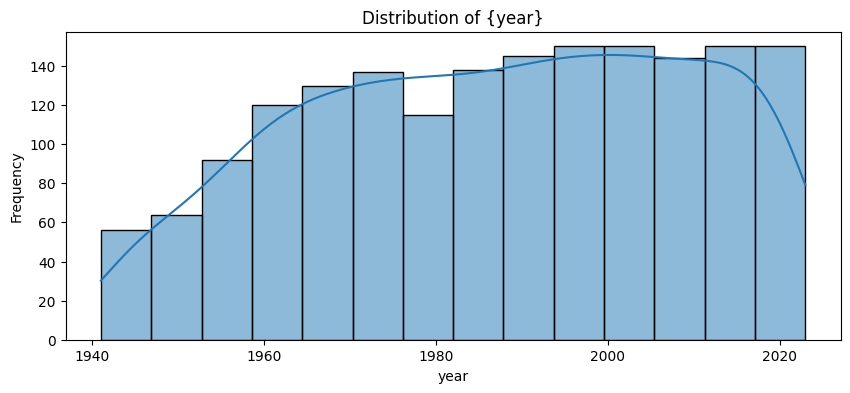

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['year'].dropna(), kde=True)
    plt.title('Distribution of {year}')
    plt.xlabel('year')
    plt.ylabel('Frequency')
    plt.show()

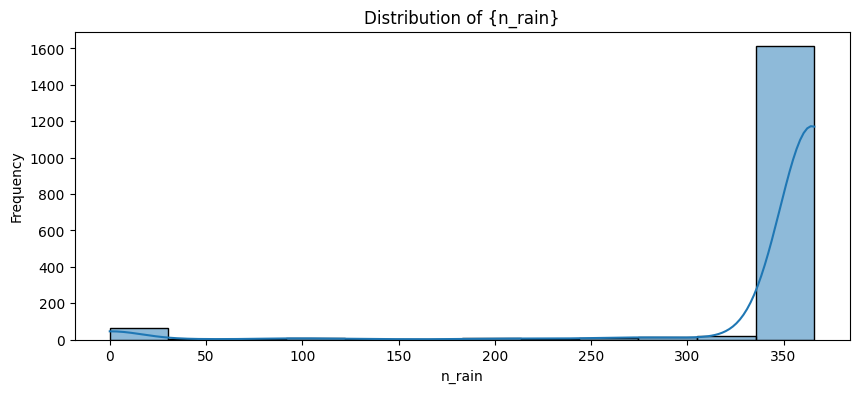

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['n_rain'].dropna(), kde=True)
    plt.title('Distribution of {n_rain}')
    plt.xlabel('n_rain')
    plt.ylabel('Frequency')
    plt.show()

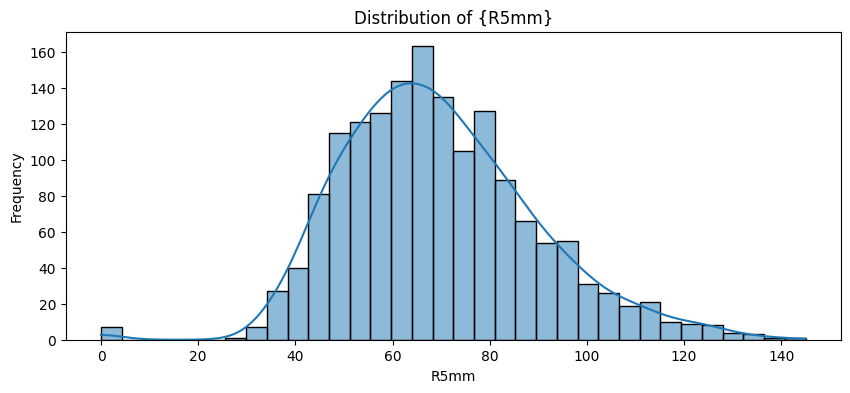

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['R5mm'].dropna(), kde=True)
    plt.title('Distribution of {R5mm}')
    plt.xlabel('R5mm')
    plt.ylabel('Frequency')
    plt.show()

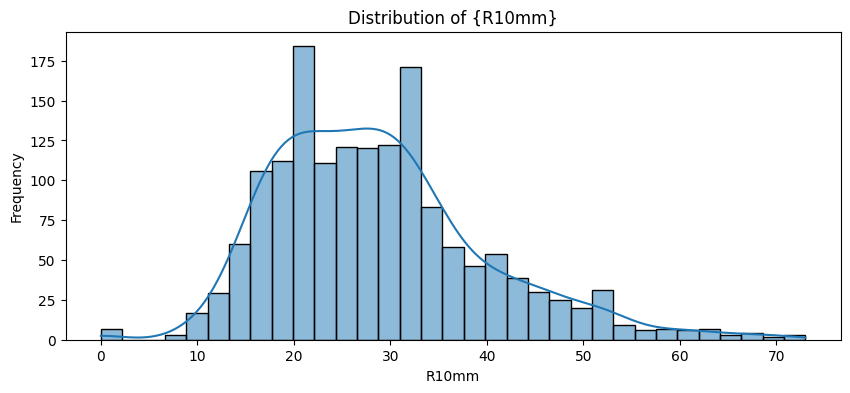

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['R10mm'].dropna(), kde=True)
    plt.title('Distribution of {R10mm}')
    plt.xlabel('R10mm')
    plt.ylabel('Frequency')
    plt.show()

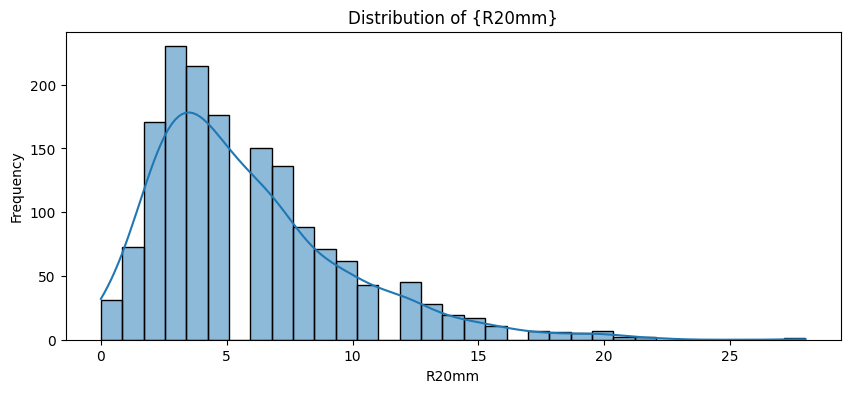

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['R20mm'].dropna(), kde=True)
    plt.title('Distribution of {R20mm}')
    plt.xlabel('R20mm')
    plt.ylabel('Frequency')
    plt.show()

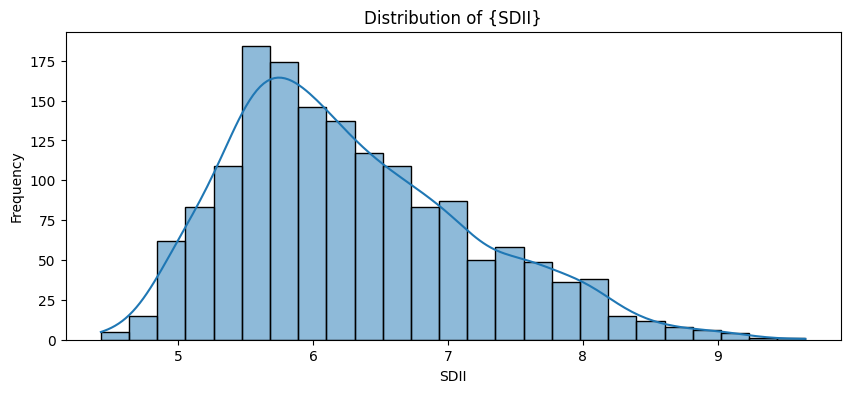

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['SDII'].dropna(), kde=True)
    plt.title('Distribution of {SDII}')
    plt.xlabel('SDII')
    plt.ylabel('Frequency')
    plt.show()

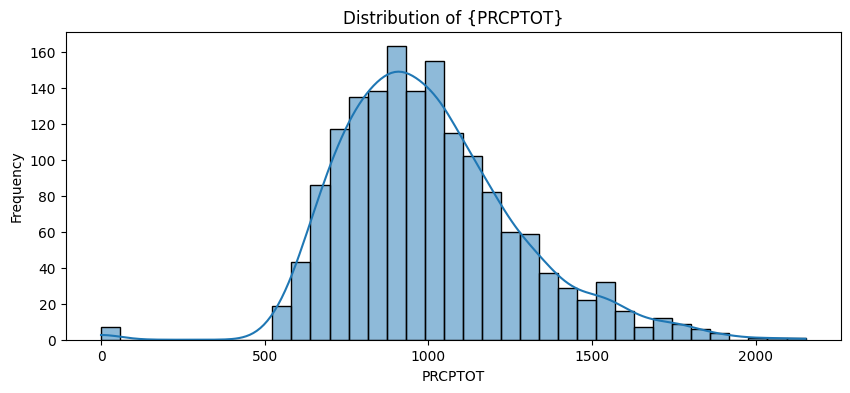

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['PRCPTOT'].dropna(), kde=True)
    plt.title('Distribution of {PRCPTOT}')
    plt.xlabel('PRCPTOT')
    plt.ylabel('Frequency')
    plt.show()

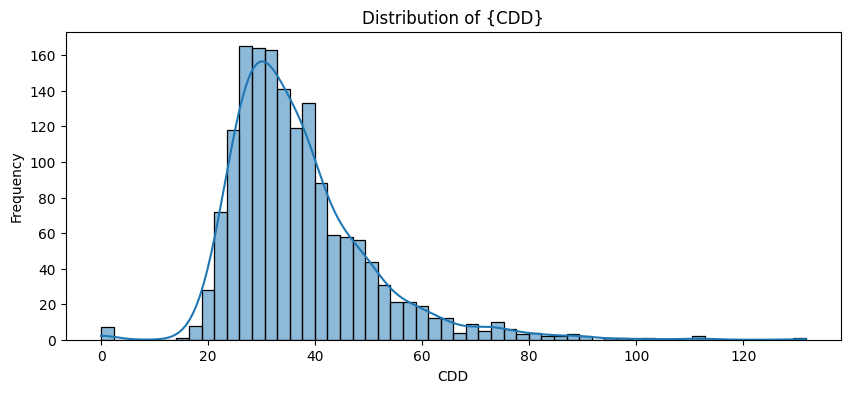

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['CDD'].dropna(), kde=True)
    plt.title('Distribution of {CDD}')
    plt.xlabel('CDD')
    plt.ylabel('Frequency')
    plt.show()

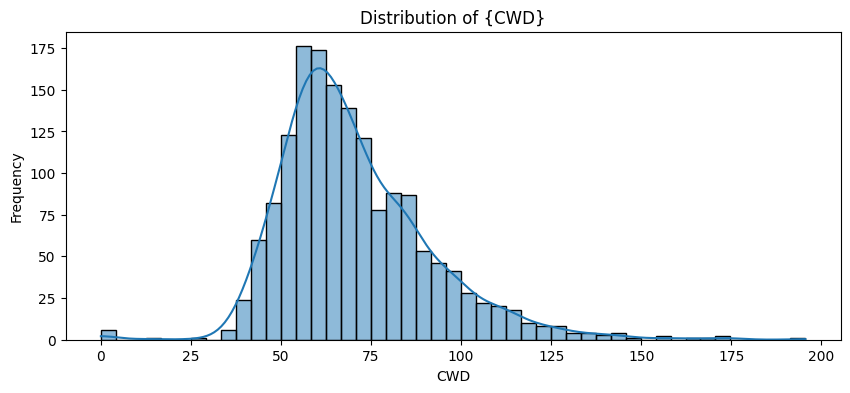

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['CWD'].dropna(), kde=True)
    plt.title('Distribution of {CWD}')
    plt.xlabel('CWD')
    plt.ylabel('Frequency')
    plt.show()

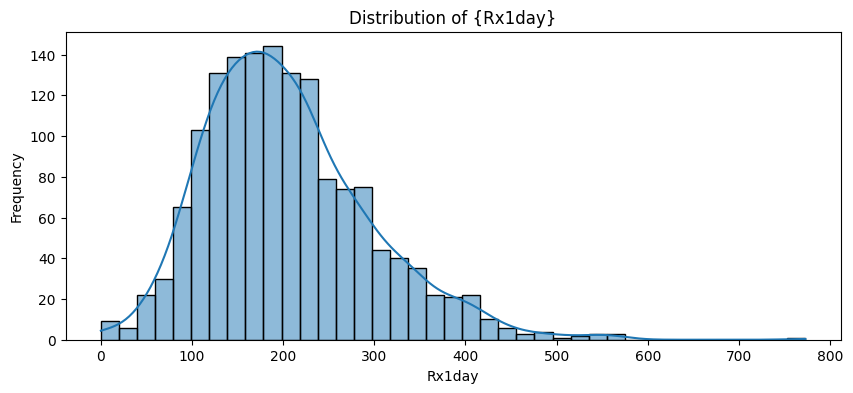

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['Rx1day'].dropna(), kde=True)
    plt.title('Distribution of {Rx1day}')
    plt.xlabel('Rx1day')
    plt.ylabel('Frequency')
    plt.show()

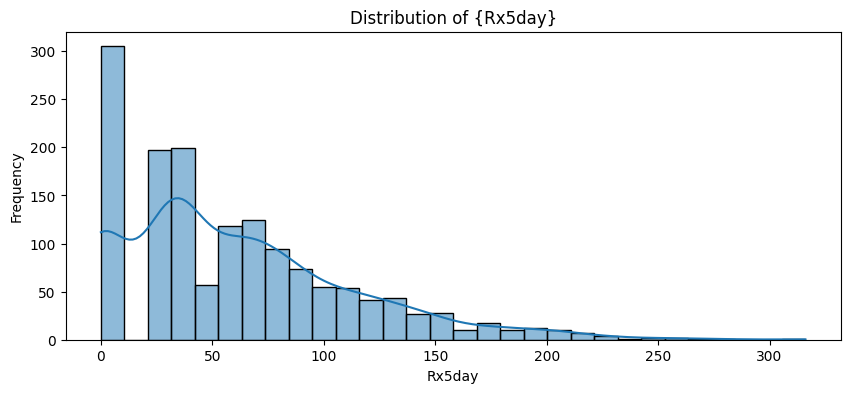

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['Rx5day'].dropna(), kde=True)
    plt.title('Distribution of {Rx5day}')
    plt.xlabel('Rx5day')
    plt.ylabel('Frequency')
    plt.show()

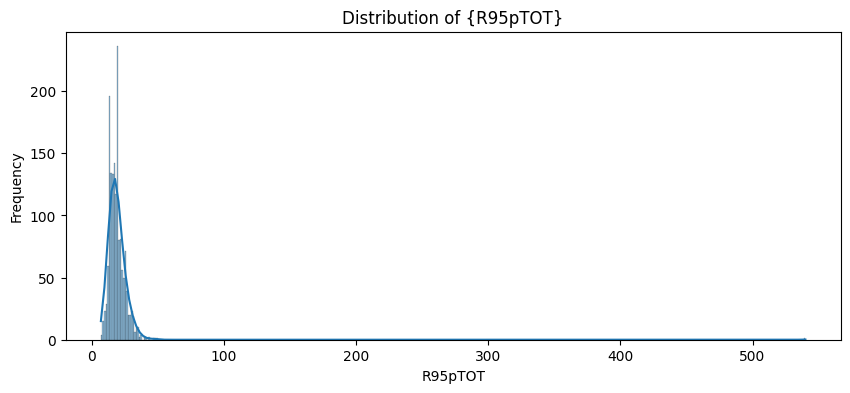

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['R95pTOT'].dropna(), kde=True)
    plt.title('Distribution of {R95pTOT}')
    plt.xlabel('R95pTOT')
    plt.ylabel('Frequency')
    plt.show()

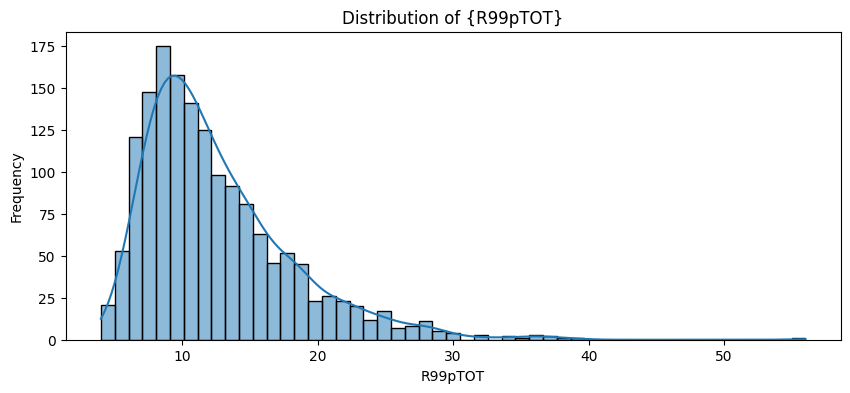

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['R99pTOT'].dropna(), kde=True)
    plt.title('Distribution of {R99pTOT}')
    plt.xlabel('R99pTOT')
    plt.ylabel('Frequency')
    plt.show()

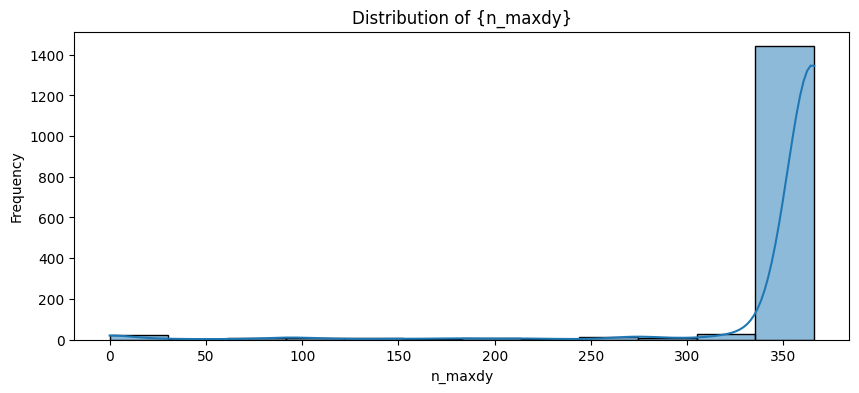

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['n_maxdy'].dropna(), kde=True)
    plt.title('Distribution of {n_maxdy}')
    plt.xlabel('n_maxdy')
    plt.ylabel('Frequency')
    plt.show()

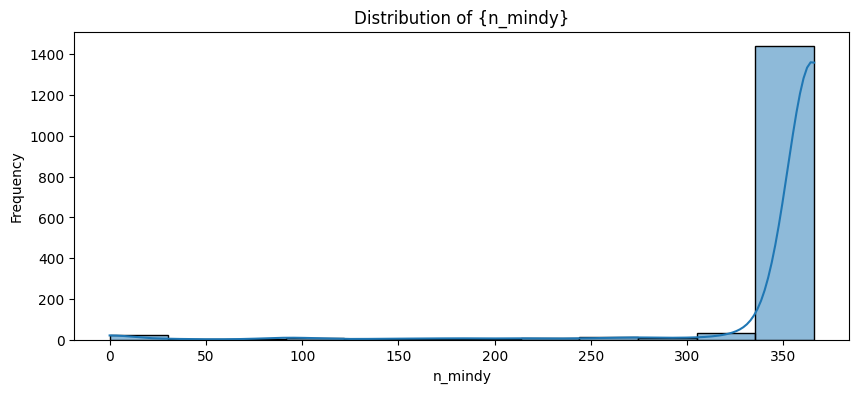

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['n_mindy'].dropna(), kde=True)
    plt.title('Distribution of {n_mindy}')
    plt.xlabel('n_mindy')
    plt.ylabel('Frequency')
    plt.show()

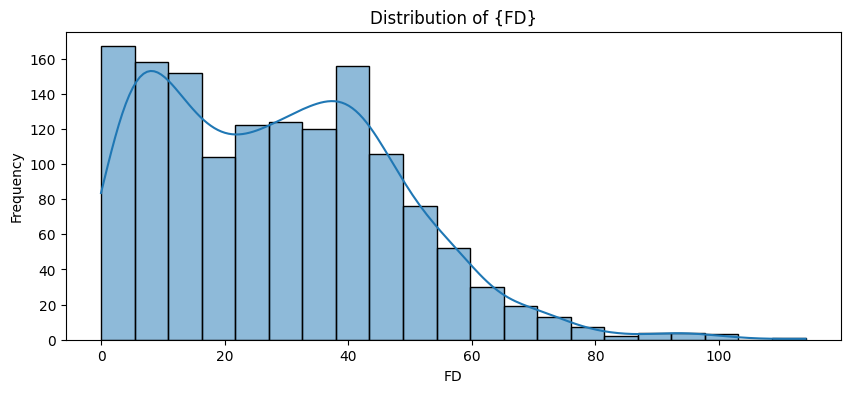

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['FD'].dropna(), kde=True)
    plt.title('Distribution of {FD}')
    plt.xlabel('FD')
    plt.ylabel('Frequency')
    plt.show()

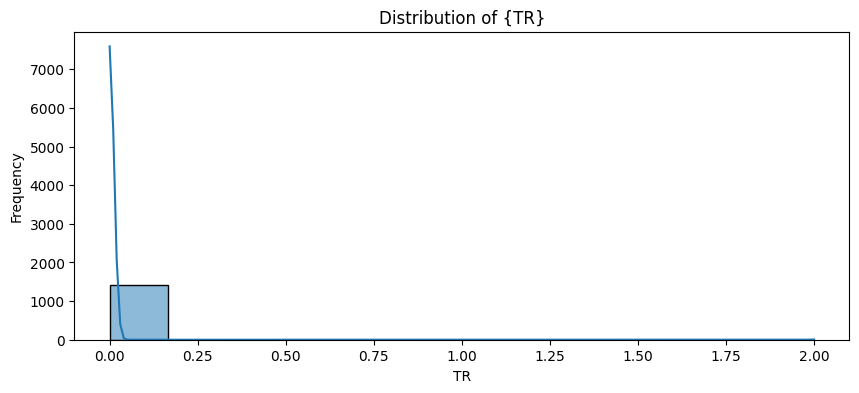

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['TR'].dropna(), kde=True)
    plt.title('Distribution of {TR}')
    plt.xlabel('TR')
    plt.ylabel('Frequency')
    plt.show()

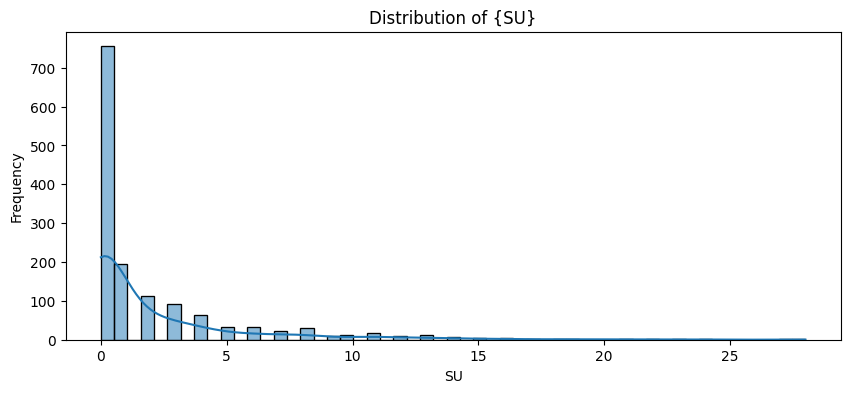

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['SU'].dropna(), kde=True)
    plt.title('Distribution of {SU}')
    plt.xlabel('SU')
    plt.ylabel('Frequency')
    plt.show()

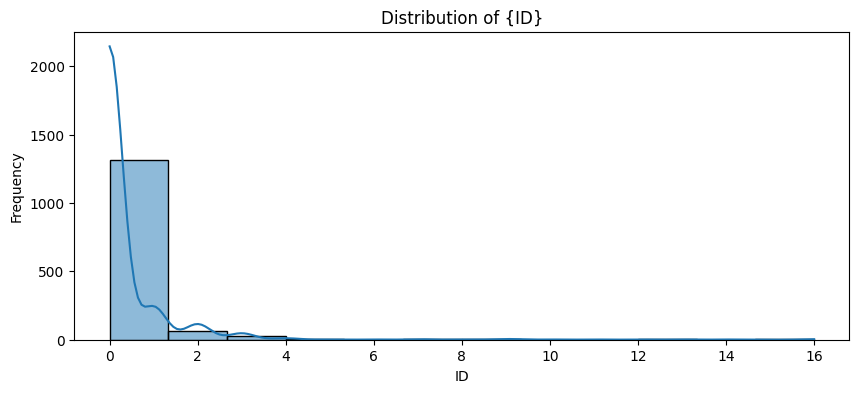

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['ID'].dropna(), kde=True)
    plt.title('Distribution of {ID}')
    plt.xlabel('ID')
    plt.ylabel('Frequency')
    plt.show()

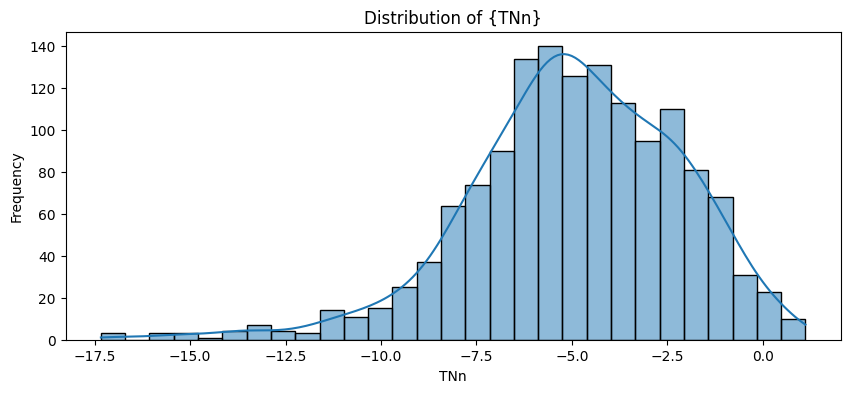

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['TNn'].dropna(), kde=True)
    plt.title('Distribution of {TNn}')
    plt.xlabel('TNn')
    plt.ylabel('Frequency')
    plt.show()

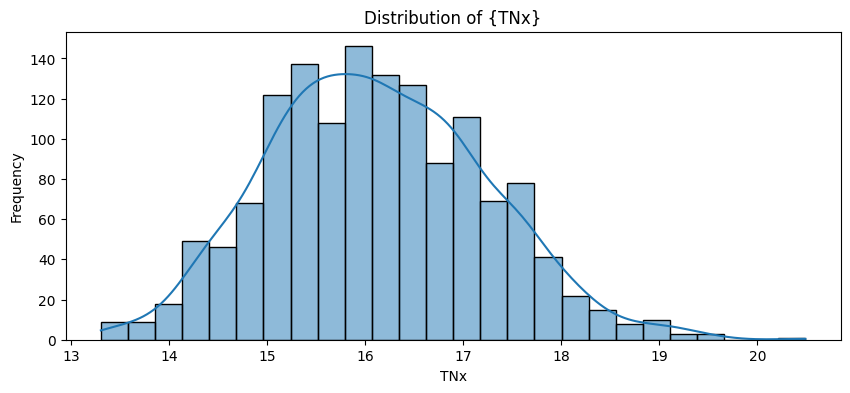

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['TNx'].dropna(), kde=True)
    plt.title('Distribution of {TNx}')
    plt.xlabel('TNx')
    plt.ylabel('Frequency')
    plt.show()

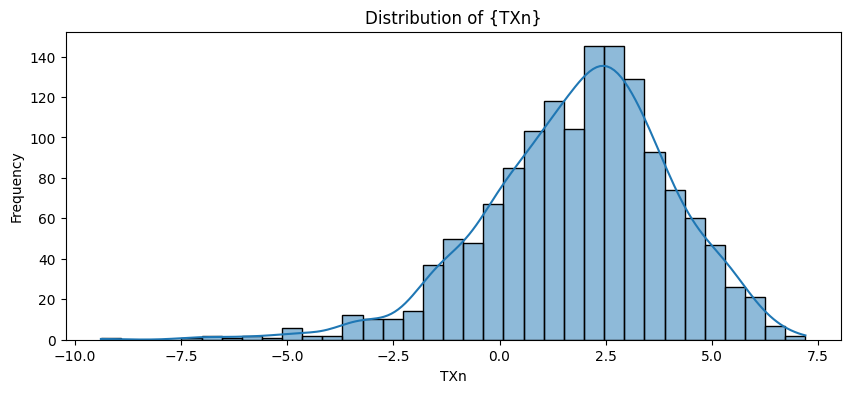

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['TXn'].dropna(), kde=True)
    plt.title('Distribution of {TXn}')
    plt.xlabel('TXn')
    plt.ylabel('Frequency')
    plt.show()

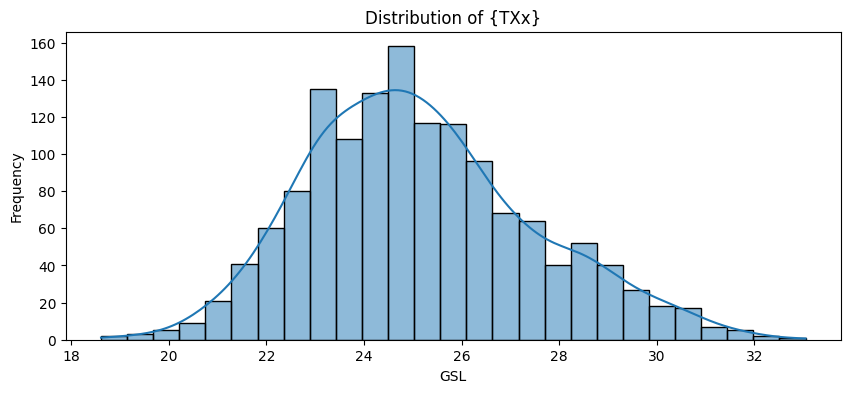

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['TXx'].dropna(), kde=True)
    plt.title('Distribution of {TXx}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

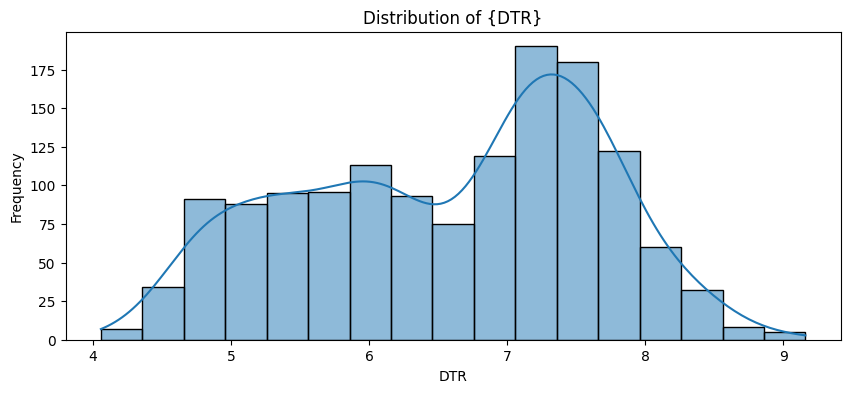

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['DTR'].dropna(), kde=True)
    plt.title('Distribution of {DTR}')
    plt.xlabel('DTR')
    plt.ylabel('Frequency')
    plt.show()

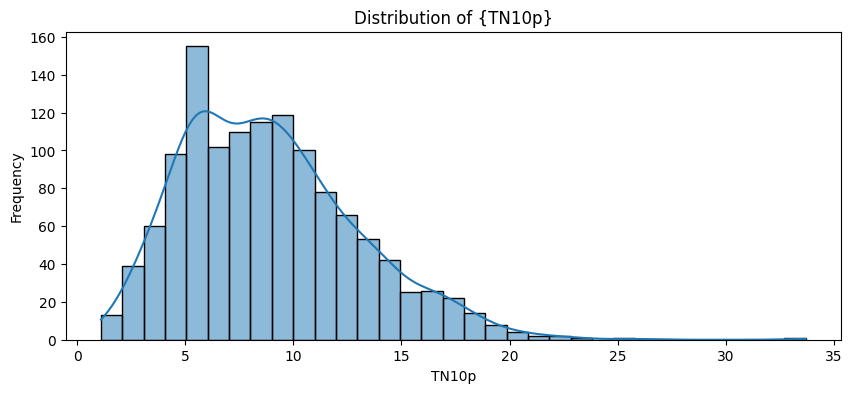

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['TN10p'].dropna(), kde=True)
    plt.title('Distribution of {TN10p}')
    plt.xlabel('TN10p')
    plt.ylabel('Frequency')
    plt.show()

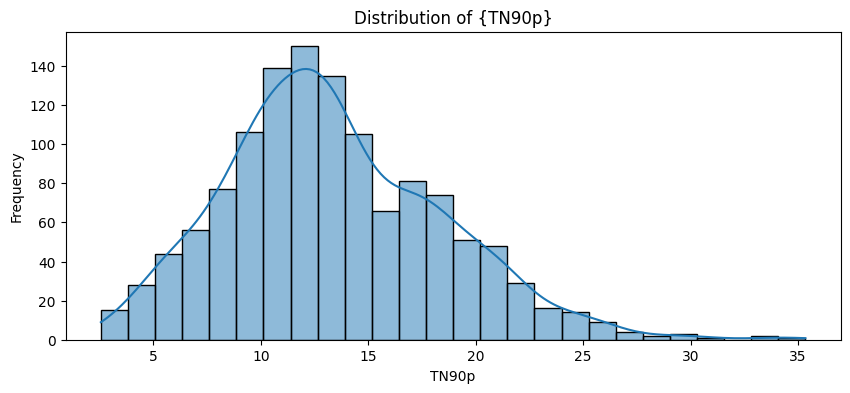

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['TN90p'].dropna(), kde=True)
    plt.title('Distribution of {TN90p}')
    plt.xlabel('TN90p')
    plt.ylabel('Frequency')
    plt.show()

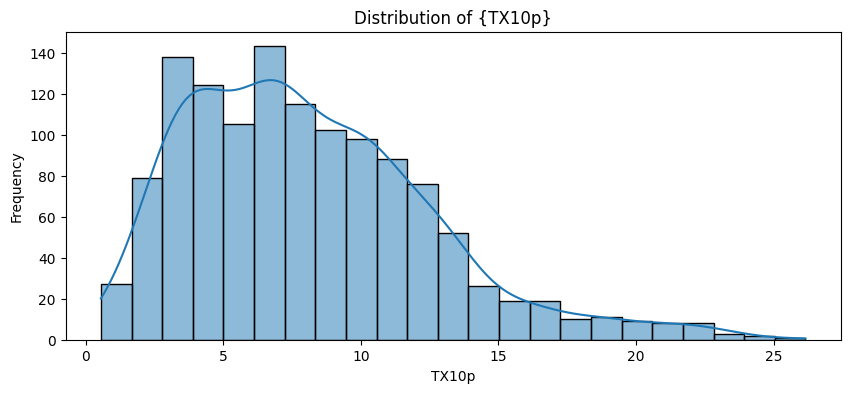

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['TX10p'].dropna(), kde=True)
    plt.title('Distribution of {TX10p}')
    plt.xlabel('TX10p')
    plt.ylabel('Frequency')
    plt.show()

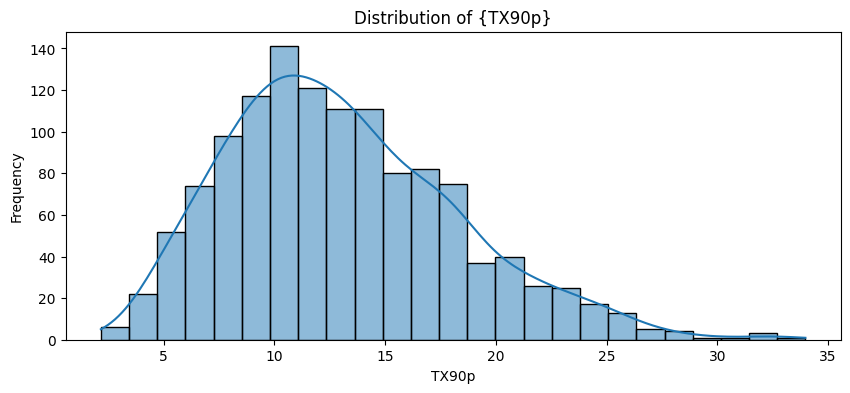

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['TX90p'].dropna(), kde=True)
    plt.title('Distribution of {TX90p}')
    plt.xlabel('TX90p')
    plt.ylabel('Frequency')
    plt.show()

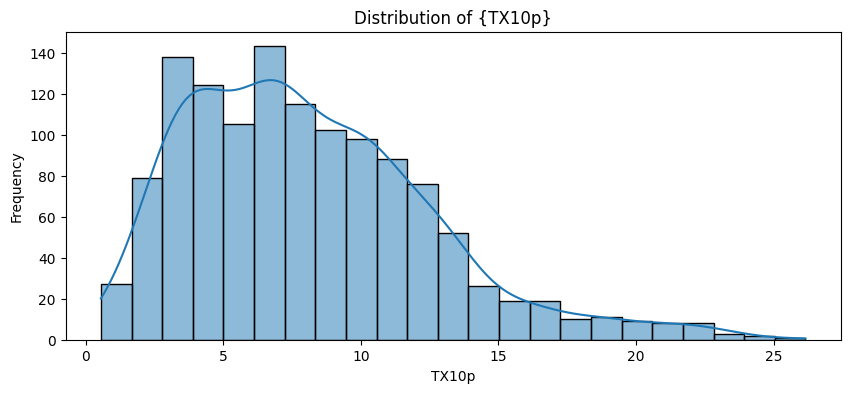

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['TX10p'].dropna(), kde=True)
    plt.title('Distribution of {TX10p}')
    plt.xlabel('TX10p')
    plt.ylabel('Frequency')
    plt.show()

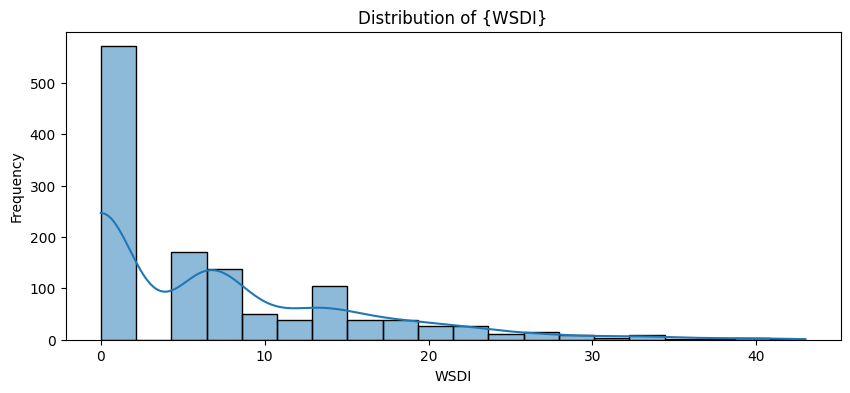

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['WSDI'].dropna(), kde=True)
    plt.title('Distribution of {WSDI}')
    plt.xlabel('WSDI')
    plt.ylabel('Frequency')
    plt.show()

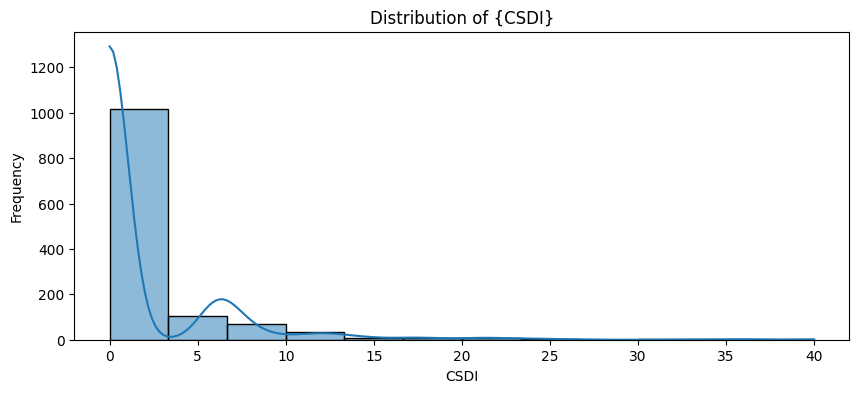

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['CSDI'].dropna(), kde=True)
    plt.title('Distribution of {CSDI}')
    plt.xlabel('CSDI')
    plt.ylabel('Frequency')
    plt.show()

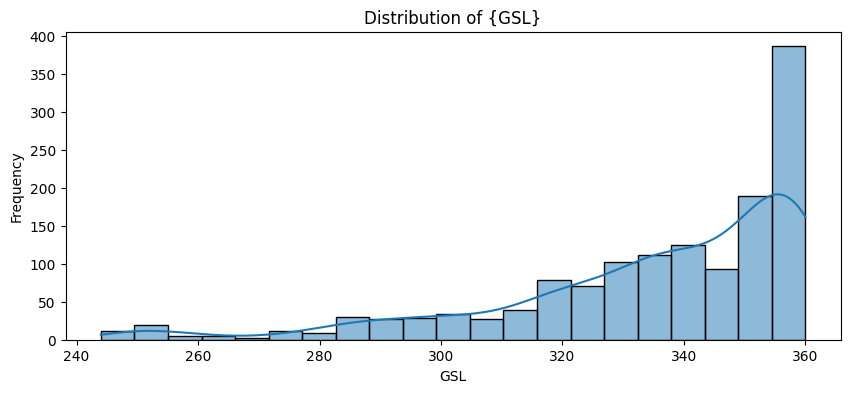

In [ ]:
    plt.figure(figsize=(10, 4))
    sns.histplot(data['GSL'].dropna(), kde=True)
    plt.title('Distribution of {GSL}')
    plt.xlabel('GSL')
    plt.ylabel('Frequency')
    plt.show()

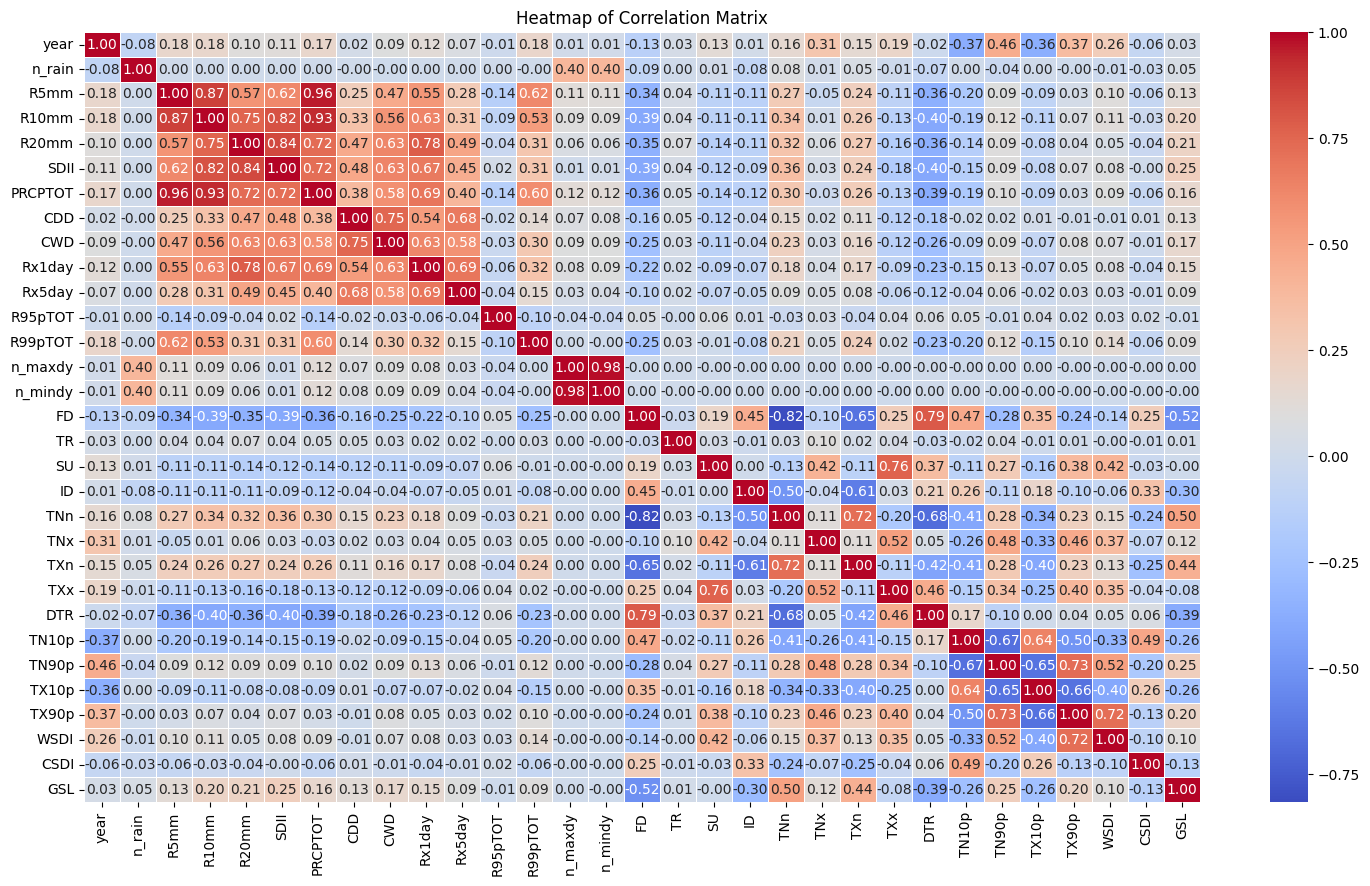

In [ ]:
# Exclude non-numeric columns from the DataFrame used to calculate the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Handling missing values - example using fillna with mean of each column
numeric_data = numeric_data.fillna(numeric_data.mean())

# Calculate the correlation matrix on numeric data only
correlation_matrix = numeric_data.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()


## Treating missing values

In [ ]:
# considering missing values as NAN

## Treating outliers

In [ ]:
# Given the nature of climate data, outliers might represent actual extreme events. Instead of removing these, we could consider robust statistical methods or confirm these values are valid observations and not data errors.

# 4. Decomposition

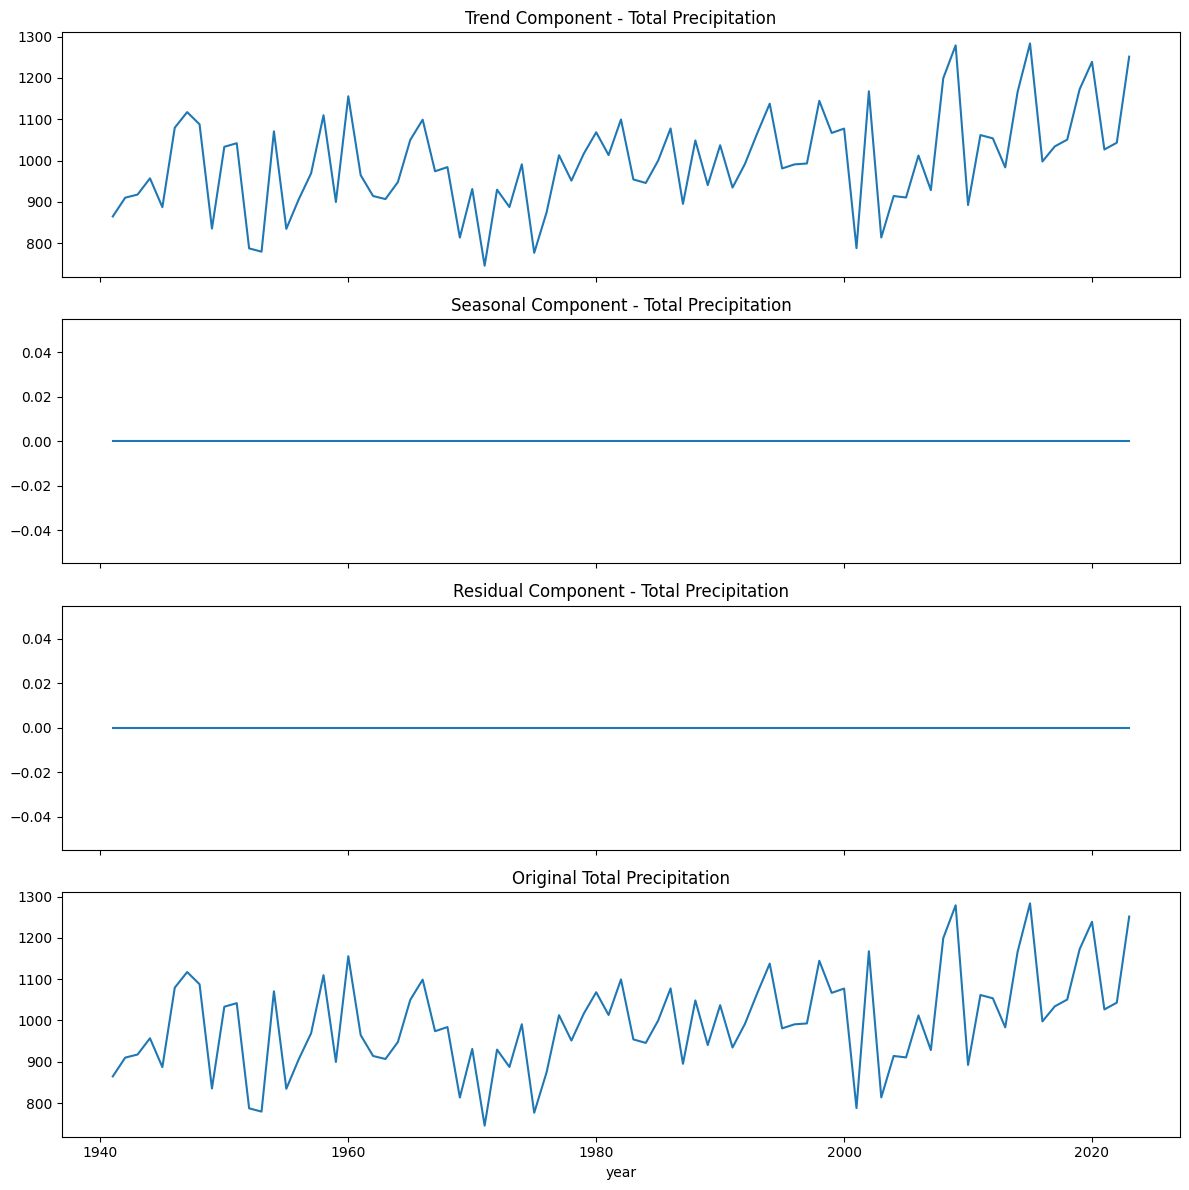

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

annual_precip = data.groupby('year')['PRCPTOT'].mean().dropna()
annual_temp = data.groupby('year')['TXx'].mean().dropna()

decomp_precip = seasonal_decompose(annual_precip, model='additive', period=1)
decomp_temp = seasonal_decompose(annual_temp, model='additive', period=1)

fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
decomp_precip.trend.plot(ax=axes[0], title='Trend Component - Total Precipitation')
decomp_precip.seasonal.plot(ax=axes[1], title='Seasonal Component - Total Precipitation')
decomp_precip.resid.plot(ax=axes[2], title='Residual Component - Total Precipitation')
annual_precip.plot(ax=axes[3], title='Original Total Precipitation')
plt.tight_layout()
plt.show()

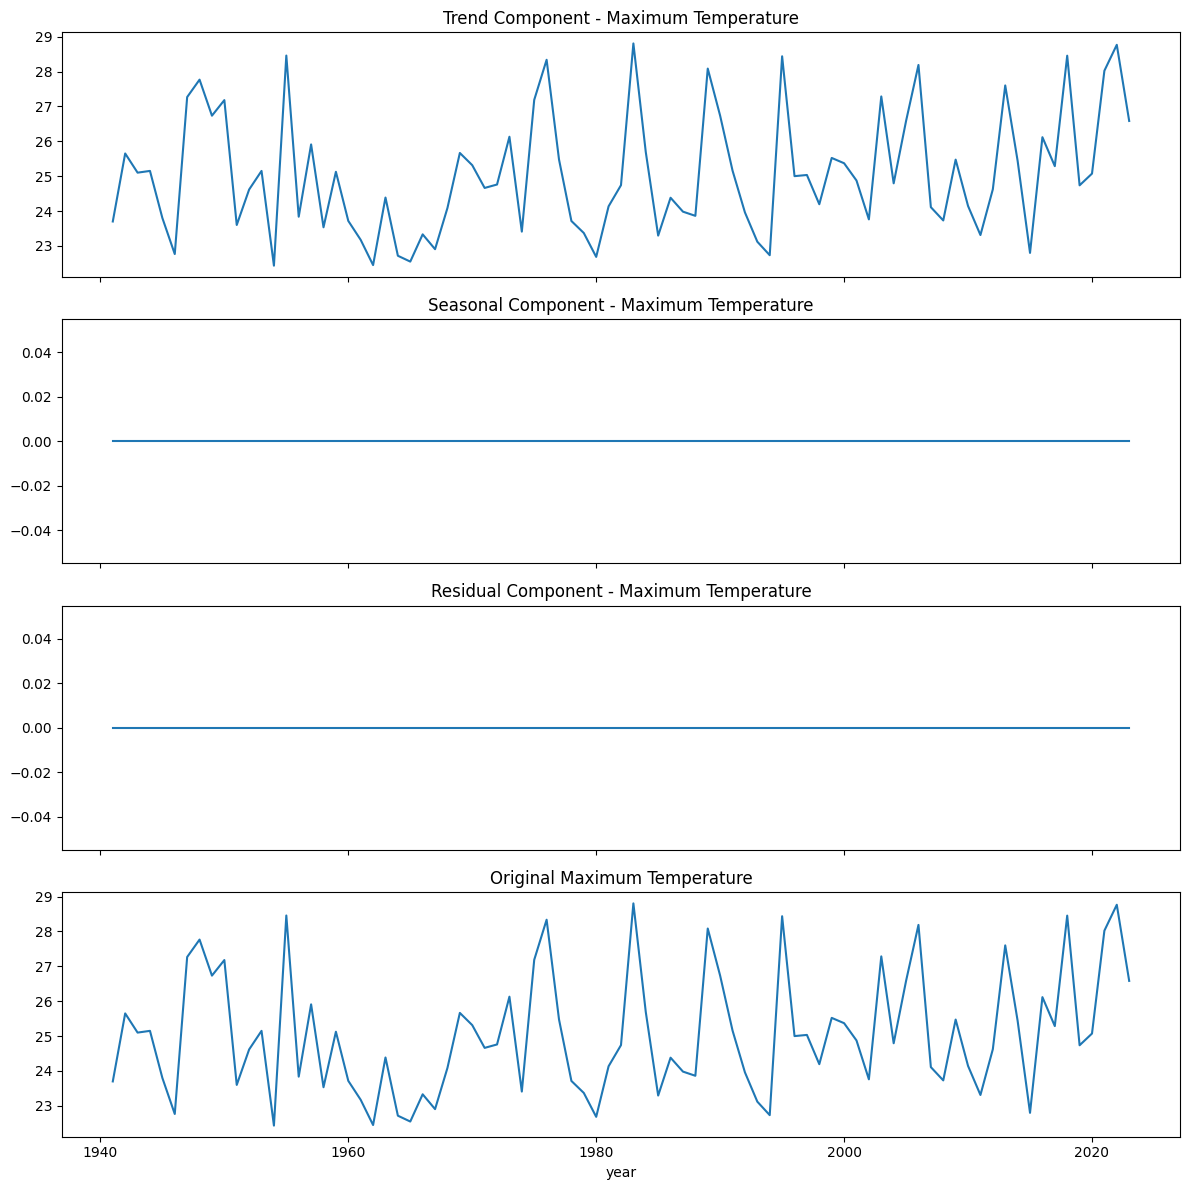

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
decomp_temp.trend.plot(ax=axes[0], title='Trend Component - Maximum Temperature')
decomp_temp.seasonal.plot(ax=axes[1], title='Seasonal Component - Maximum Temperature')
decomp_temp.resid.plot(ax=axes[2], title='Residual Component - Maximum Temperature')
annual_temp.plot(ax=axes[3], title='Original Maximum Temperature')
plt.tight_layout()
plt.show()


# 5. Stationarity Testing

In [ ]:
prcptot_data = data[['year', 'PRCPTOT']].dropna()

adf_test_prcptot = adfuller(prcptot_data['PRCPTOT'], autolag='AIC')
print('ADF Statistic for Total Precipitation: %f' % adf_test_prcptot[0])
print('p-value for Total Precipitation: %f' % adf_test_prcptot[1])

def interpret_adf_result(adf_result):
    print("ADF Statistic: %f" % adf_result[0])
    print("p-value: %f" % adf_result[1])
    print("Critical Values:")
    for key, value in adf_result[4].items():
        print('\t%s: %.3f' % (key, value))
    if adf_result[0] < adf_result[4]["5%"]:
        print("Reject the null hypothesis (H0), the data does not have a unit root and is stationary.")
    else:
        print("Fail to reject the null hypothesis (H0), the data has a unit root and is not stationary.")

print("Results for Total Precipitation:")
interpret_adf_result(adf_test_prcptot)


ADF Statistic for Total Precipitation: -3.067652
p-value for Total Precipitation: 0.029042
Results for Total Precipitation:
ADF Statistic: -3.067652
p-value: 0.029042
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


In [ ]:
txx_data = data[['year', 'TXx']].dropna()
adf_test_txx = adfuller(txx_data['TXx'], autolag='AIC')
print('ADF Statistic for Maximum Temperature: %f' % adf_test_txx[0])
print('p-value for Maximum Temperature: %f' % adf_test_txx[1])

def interpret_adf_result(adf_result):
    print("ADF Statistic: %f" % adf_result[0])
    print("p-value: %f" % adf_result[1])
    print("Critical Values:")
    for key, value in adf_result[4].items():
        print('\t%s: %.3f' % (key, value))
    if adf_result[0] < adf_result[4]["5%"]:
        print("Reject the null hypothesis (H0), the data does not have a unit root and is stationary.")
    else:
        print("Fail to reject the null hypothesis (H0), the data has a unit root and is not stationary.")

print("Results for Maximum Temperature:")
interpret_adf_result(adf_test_txx)


ADF Statistic for Maximum Temperature: -5.419725
p-value for Maximum Temperature: 0.000003
Results for Maximum Temperature:
ADF Statistic: -5.419725
p-value: 0.000003
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


# 6. Statistical Analysis

In [ ]:
data.sort_values('year', inplace=True)
def perform_mk_test(data, variable):
    data_filtered = data.dropna(subset=[variable])
    result = mk.original_test(data_filtered[variable])
    return result

mk_results_prcptot = perform_mk_test(data, 'PRCPTOT')
mk_results_txx = perform_mk_test(data, 'TXx')

print("Total Precipitation Trends:", mk_results_prcptot)

Total Precipitation Trends: Mann_Kendall_Test(trend='increasing', h=True, p=2.6978419498391304e-13, z=7.308630767500061, Tau=0.1220975636583622, s=155407.0, var_s=452130204.3333333, slope=0.1001898444482888, intercept=886.7485990524897)


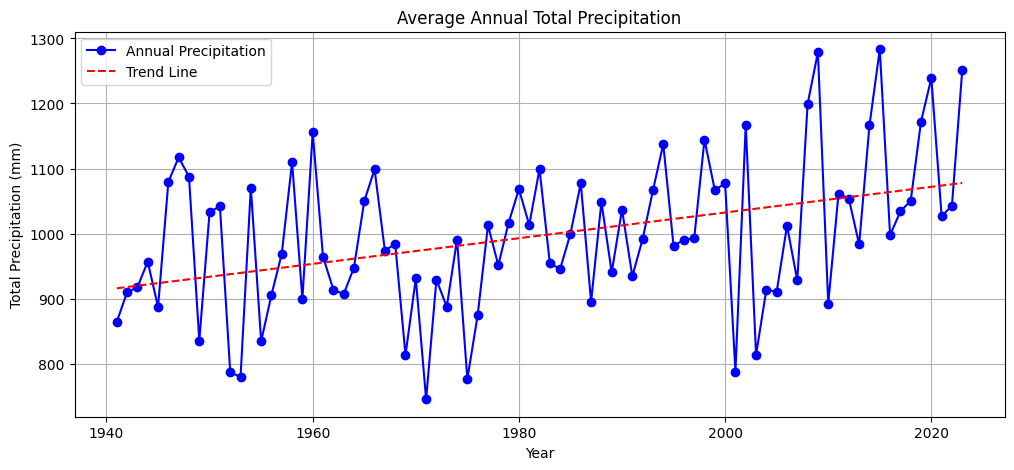

In [ ]:
if 'year' in data.columns:
    data['year'] = pd.to_datetime(data['year'].astype(str), format='%Y')
    annual_precip = data.groupby(data['year'].dt.year)['PRCPTOT'].mean()
    plt.figure(figsize=(12, 5))
    plt.plot(annual_precip.index, annual_precip, color='blue', marker='o', linestyle='-', label='Annual Precipitation')

    x = np.arange(len(annual_precip))
    y = annual_precip.values
    slope, intercept = np.polyfit(x, y, 1)
    trend_line = intercept + slope * x
    plt.plot(annual_precip.index, trend_line, 'r--', label='Trend Line')

    plt.title('Average Annual Total Precipitation')
    plt.xlabel('Year')
    plt.ylabel('Total Precipitation (mm)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Column 'year' not found in DataFrame.")

In [ ]:
print("Maximum Temperature Trends:", mk_results_txx)

Maximum Temperature Trends: Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=9.041245844034083, Tau=0.1598580721466588, s=162192.0, var_s=321808081.3333333, slope=0.0013429256594724246, intercept=23.94383693045563)


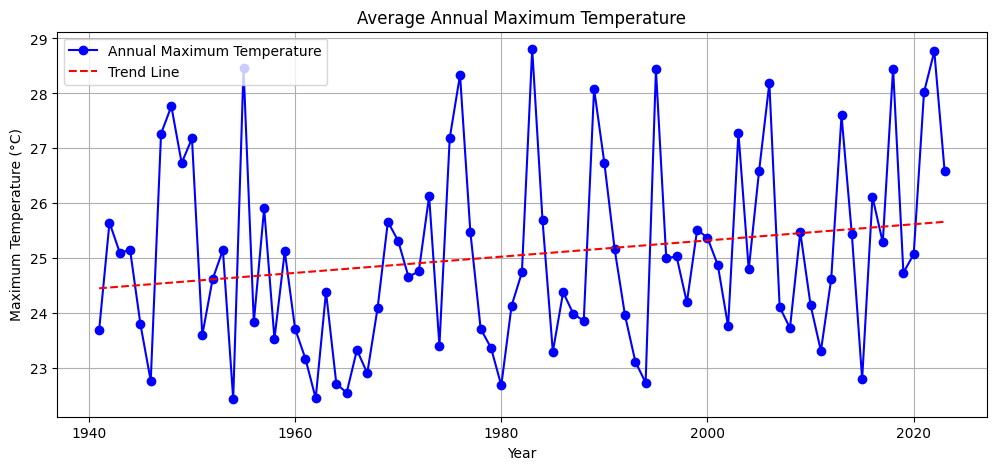

In [ ]:
if 'year' in data.columns:
    annual_temp = data.groupby(data['year'].dt.year)['TXx'].mean()
    plt.figure(figsize=(12, 5))
    plt.plot(annual_temp.index, annual_temp, color='blue', marker='o', linestyle='-', label='Annual Maximum Temperature')

    x = np.arange(len(annual_temp))
    y = annual_temp.values
    slope, intercept = np.polyfit(x, y, 1)
    trend_line = intercept + slope * x
    plt.plot(annual_temp.index, trend_line, 'r--', label='Trend Line')

    plt.title('Average Annual Maximum Temperature')
    plt.xlabel('Year')
    plt.ylabel('Maximum Temperature (°C)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Column 'year' not found in DataFrame.")
